# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [5]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-11 23:29:49--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-11 23:29:49--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv.1’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.002s  

2025-03-11 23:29:49 (34.6 MB/s) - ‘E

In [6]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Email
Address
Avatar
Avg. Session Length (Promedio de duración de la sesión)
Time on App (Tiempo en la App)
Time on Website (Tiempo en el Sitio Web)
Length of Membership (Antigüedad de membresía, en años)
Yearly Amount Spent (Cantidad gastada anualmente)parece relevante, lo cual sugiere que los clientes leales gastan más.

**Impacto en las estrategias de marketing:**

* **Priorizar la app:** Si se descubre que `Time on App` es un predictor más fuerte del gasto que `Time on Website`, deberíamos invertir más recursos en optimizar la experiencia de la app móvil.  Podríamos lanzar campañas promocionales para fomentar su uso, mejorar su diseño y funcionalidad, y añadir características que incentiven las compras.
* **Segmentación de clientes:**  Podríamos segmentar a los clientes según su antigüedad de membresía. Los clientes con membresías más largas podrían recibir ofertas personalizadas o exclusivas para mantener su lealtad y fomentar un mayor gasto. Los clientes nuevos podrían recibir ofertas especiales para incentivar la compra recurrente.
* **Análisis de la duración de la sesión:** Una mayor duración de la sesión podría indicar mayor interés.  Deberíamos investigar si las sesiones más largas conllevan mayores compras y, en caso afirmativo, identificar cómo alargar las sesiones productivas de forma natural y atractiva.
* **Experiencia omnicanal:** Aunque la app parece importante, no debemos descuidar el sitio web.  Optimizar la experiencia en ambos canales para una mejor interacción del cliente será crucial. Debemos asegurar consistencia en la experiencia de usuario para fomentar el uso de ambos canales.
* **Campañas de Retargeting:** Las variables podrían servir para crear campañas de retargeting más específicas para usuarios con sesiones cortas en la app o sitio web, o para clientes con bajo gasto anual.

En definitiva, la exploración de estos datos permitirá comprender mejor el comportamiento de los clientes y dirigir mejor nuestros esfuerzos de marketing para maximizar el retorno de la inversión.


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

Si se detecta que los clientes con mayor antigüedad (Length of Membership) gastan más, se implementarían estrategias para acelerar la "graduación" de los nuevos clientes a miembros más antiguos.  Esto podría incluir programas de fidelización con recompensas por compras frecuentes o por alcanzar ciertos hitos de gasto,  ofertas exclusivas para miembros con antigüedad, contenido personalizado basado en su historial de compras o programas de referidos para incentivar la invitación de nuevos clientes.  Se podrían segmentar los nuevos clientes con programas específicos para su retención y para fomentar el gasto incrementando gradualmente su nivel de membresía a través de incentivos o acciones especiales.  Paralelamente, se analizaría si la baja inversión de tiempo en el sitio web, en comparación con la aplicación, se debe a problemas de usabilidad o a una falta de contenido relevante, para mejorar la experiencia del usuario y fomentar el aumento del tiempo en el sitio web.  No necesariamente se debe priorizar obligatoriamente un aumento del tiempo en el sitio web, sino analizar qué tipo de usuarios prefieren la web frente a la app para optimizar la experiencia y convertirlos a clientes de mayor valor.


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


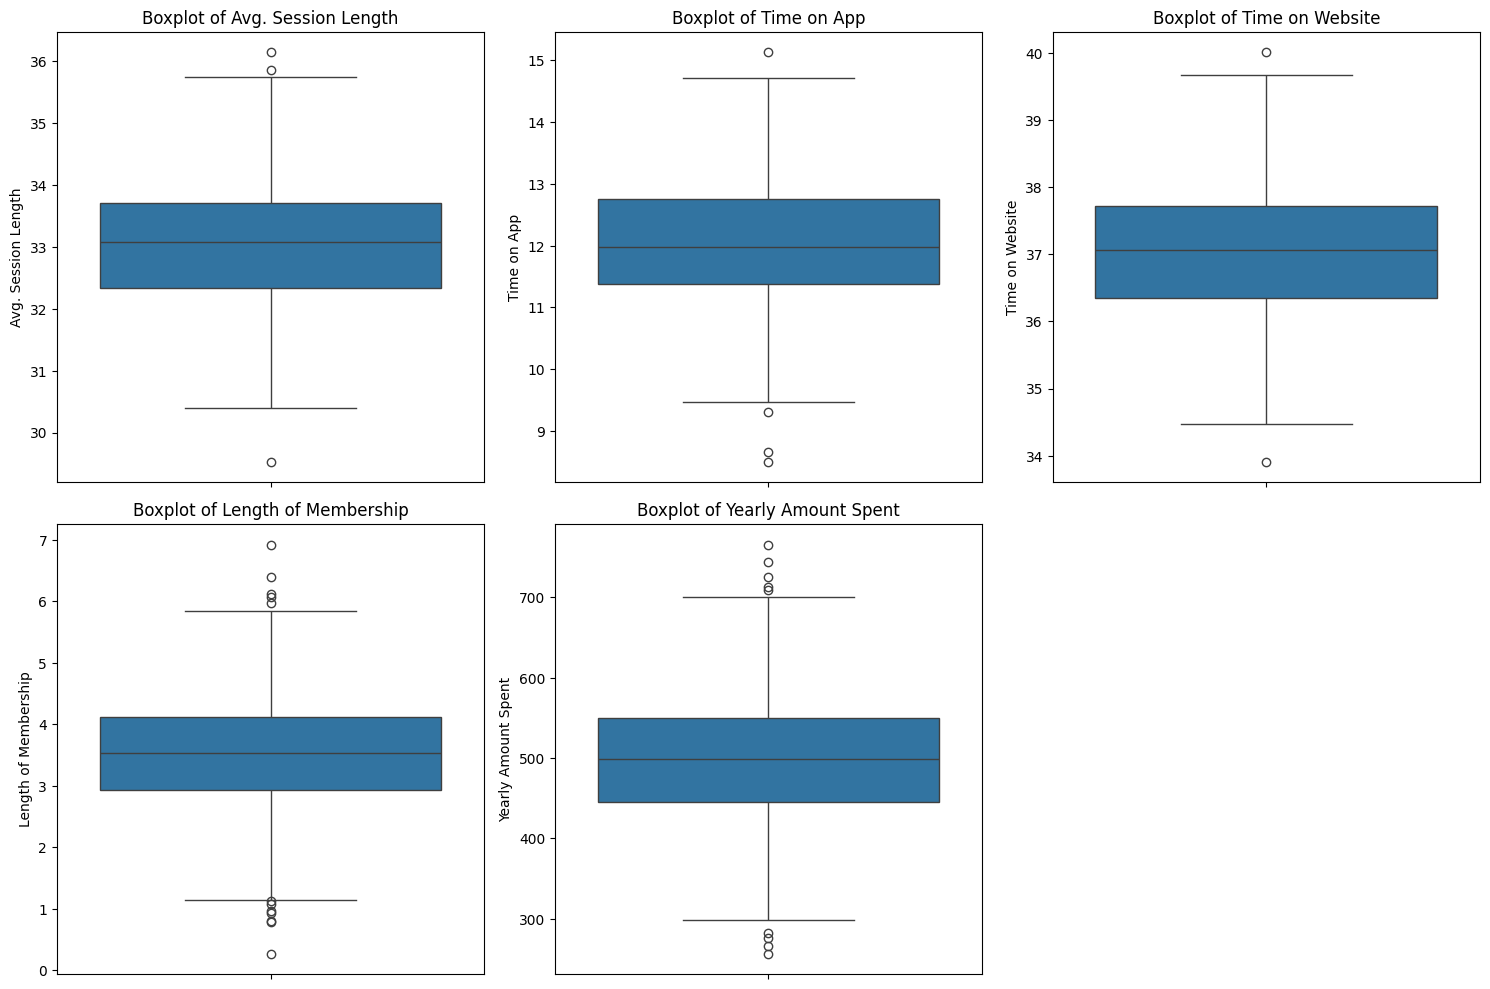

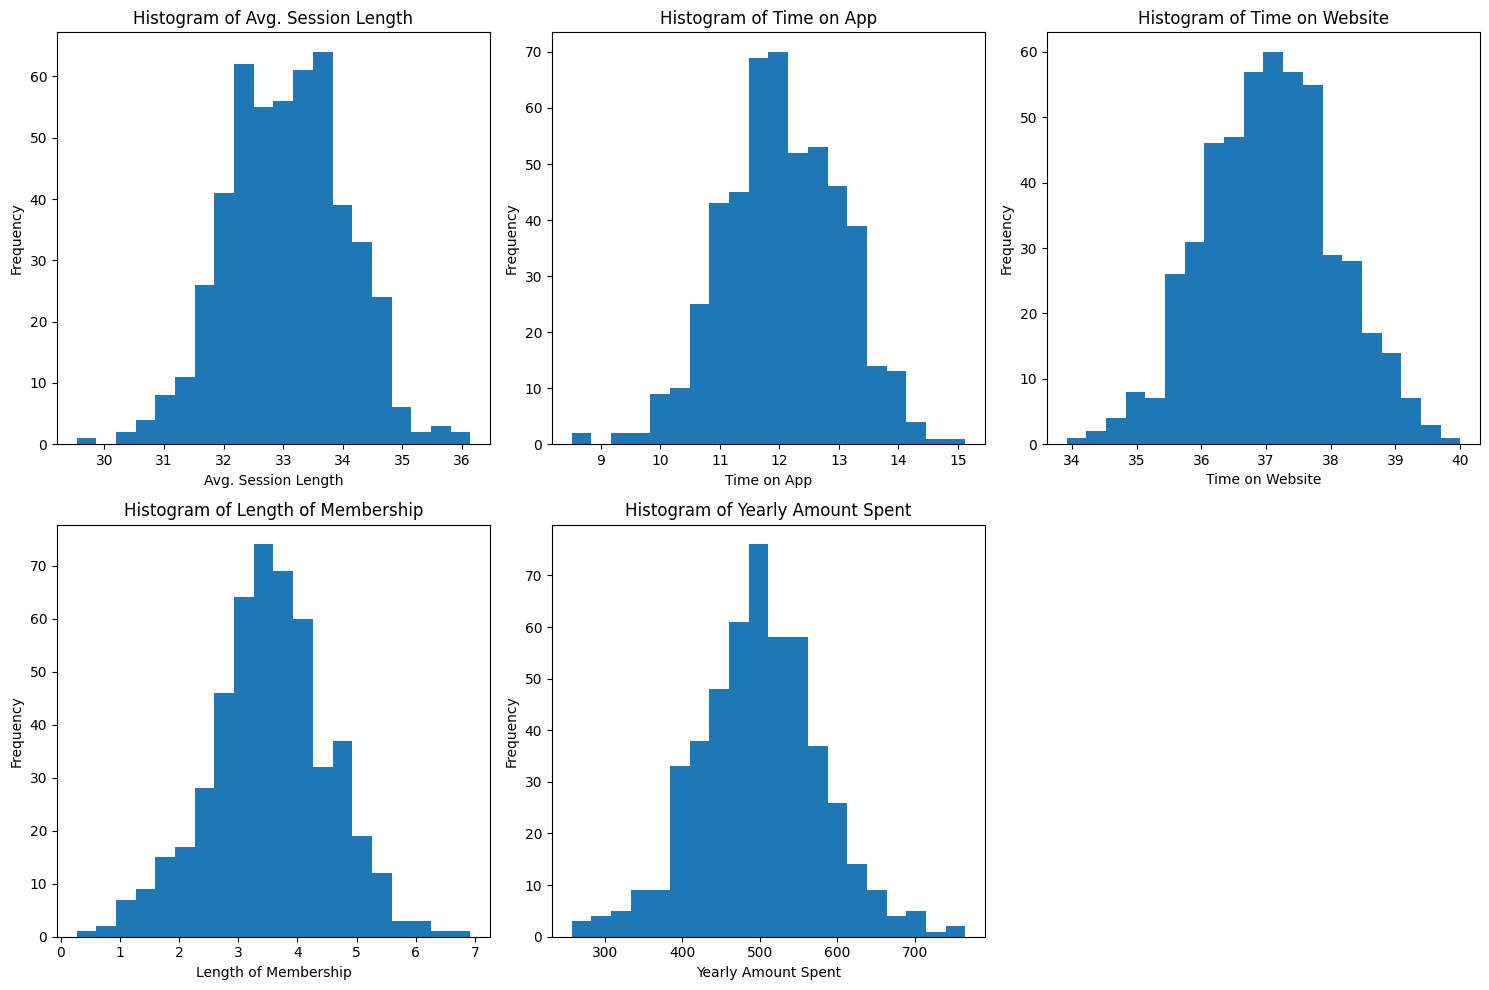

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Ecommerce _Customers.csv')

# Create boxplots for the specified columns
cols_to_plot = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization

for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Create histograms for the same columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_plot):
  plt.subplot(2, 3, i + 1)
  plt.hist(df[col], bins=20)  # You can adjust the number of bins
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

Las columnas "Avg. Session Length", "Time on App", "Time on Website", y "Length of Membership" son relevantes para explicar el gasto anual porque reflejan la interacción y el compromiso del cliente con la empresa.  Un mayor tiempo en la aplicación o sitio web, así como sesiones más largas, indican una mayor exposición a los productos y servicios ofrecidos, lo que aumenta las posibilidades de compra.  Además, la antigüedad de la membresía ("Length of Membership")  sugiere un nivel de lealtad y familiaridad con la marca, lo cual normalmente se correlaciona con un mayor gasto a lo largo del tiempo.  En esencia, estas variables actúan como indicadores de la interacción del cliente y su relación con la plataforma de la empresa, y por lo tanto predicen su propensión a comprar.


In [9]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?


Reservar una porción de los datos para pruebas, en lugar de usarlos para entrenar el modelo, es crucial para asegurar que nuestras predicciones sean confiables para clientes nuevos.  Al entrenar el modelo con el 80% de los datos, optimizamos su capacidad para identificar patrones en el comportamiento de clientes *existentes*. Sin embargo, el objetivo final es predecir el comportamiento de *futuros* clientes.  La muestra de prueba (20% restante) nos proporciona datos "frescos", que el modelo no ha visto durante el entrenamiento.  Evaluando la precisión del modelo en estos datos de prueba, determinamos su capacidad para generalizar y predecir el gasto de nuevos clientes. De esta forma, garantizamos que no hemos "memorizado" los datos existentes, sino que hemos aprendido los patrones reales que nos permitirán hacer predicciones precisas sobre clientes que aún no interactúan con la plataforma.  En esencia, esta técnica valida el modelo y asegura su utilidad práctica en un entorno real.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
                                                  X,  # Asegurar 2D para sklearn
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42
                                              )

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 400 muestras
Prueba: 100 muestras


## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

Si el coeficiente de "Time on App" es grande y positivo, significa que existe una fuerte correlación entre el tiempo que un usuario pasa en la aplicación y la cantidad que gasta anualmente.  Para aprovechar esta información, se podrían implementar campañas y mejoras en la aplicación que incentiven a los usuarios a pasar más tiempo en ella. Por ejemplo, se podrían introducir nuevas funcionalidades atractivas, como juegos, concursos o contenido exclusivo, que retengan la atención del usuario. Además, se podrían implementar notificaciones push personalizadas o estrategias de gamificación para recompensar el uso prolongado de la app, impulsando así el tiempo que los usuarios dedican a ella y, por ende, sus compras. Se podrían crear desafíos o misiones dentro de la app para incentivar un mayor tiempo de uso y recompensar al usuario por completarlos, o bien implementar un sistema de puntos o recompensas que se canjeen por descuentos o productos exclusivos.


In [21]:
# Crear instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Extraer los coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): -1044.26
Coeficiente (beta_1): 25.60


## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

Un R² cercano a 0.80 o 0.90 indica que el modelo explica una gran parte de la variabilidad en el gasto anual de los clientes.  El 80% o 90% de las fluctuaciones en el gasto se pueden atribuir a las variables predictoras incluidas en el modelo (tiempo en la app, tiempo en el sitio web, duración de la sesión y antigüedad de la membresía).  Sin embargo, si bien es una medida de ajuste "buena", la bondad del modelo depende de los objetivos de negocio. Un R² alto es positivo, pero no garantiza que el modelo sea lo suficientemente preciso para tomar decisiones comerciales cruciales, ya que puede haber otras variables que no hemos incluido en el análisis, como campañas de marketing específicas o factores externos al negocio. La utilidad del modelo depende de si la precisión de las predicciones generadas es suficiente para sustentar las decisiones de marketing y alcanzar los objetivos propuestos.


Un MAE de 15 USD representa el error promedio en las predicciones del gasto anual.  Si el gasto medio de los clientes es significativamente superior a los 15 USD, el margen de error podría ser aceptable. Sin embargo, si el gasto promedio es similar o inferior, un error de predicción de 15 USD podría ser considerable y afectar las decisiones de inversión en marketing. Por ejemplo, una campaña dirigida a un cliente con predicción de bajo gasto podría no ser rentable si la predicción está equivocada por 15 USD, mientras que una campaña para un cliente de mayor gasto resultaría en un error menor en términos relativos. Para determinar la aceptabilidad, el MAE debe compararse con el gasto promedio y la rentabilidad esperada de las campañas de marketing.


In [23]:
# Predicciones en entrenamiento y prueba
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# MSE y R^2 en entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# MSE y R^2 en prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train:.2f}")
print(f"R^2: {r2_train:.2f}")
print("\nConjunto de Prueba:")
print(f"MSE: {mse_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Conjunto de Entrenamiento:
MSE: 95.82
R^2: 0.99

Conjunto de Prueba:
MSE: 109.86
R^2: 0.98


## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

Observando los coeficientes del modelo de regresión lineal, podemos identificar la variable que más influye en el gasto anual de los clientes.  Un coeficiente más alto (en valor absoluto) indica una mayor influencia. Por ejemplo, si el coeficiente de "Length of Membership" es el más alto, significa que la antigüedad de la membresía es el factor que más predice el gasto anual. Esto sugiere que los clientes más antiguos tienden a gastar más.  Si por el contrario, "Time on App" presenta el coeficiente más alto, implica que el tiempo que los usuarios pasan en la aplicación móvil es el predictor más importante del gasto.

En términos de estrategia de negocios, este conocimiento es crucial para enfocar las campañas y las inversiones de la empresa. Si "Length of Membership" es el factor determinante, se priorizará la fidelización de los clientes, incentivando la retención de los clientes existentes a través de programas de fidelización, promociones exclusivas y beneficios especiales para los clientes de mayor antigüedad. El objetivo será convertir nuevos clientes en miembros leales a largo plazo.  Si es "Time on App" el factor más influyente, se deben invertir recursos en mejorar la aplicación, como la optimización del UI/UX, añadir funcionalidades atractivas, implementar notificaciones personalizadas e introducir estrategias de gamificación para aumentar el tiempo que los usuarios pasan en la app, lo cual a su vez incrementará sus posibilidades de compra y el gasto anual.  El foco estará en la experiencia del usuario y su interacción dentro de la aplicación.

Para comunicar estos resultados a un equipo directivo que no maneja detalles estadísticos, es importante evitar términos técnicos y explicar los hallazgos de forma clara y concisa. Se puede decir, por ejemplo: "Hemos descubierto que los clientes más antiguos tienden a gastar más (o los que más usan la app), por lo que debemos enfocarnos en fidelizarlos ofreciendo promociones especiales y mejoras en la aplicación" (o en mantenerlos activos en la app). Se deben utilizar gráficos y visualizaciones sencillas para ilustrar los hallazgos, como gráficos de barras que comparen el gasto anual entre los clientes antiguos y nuevos o el gasto según la cantidad de tiempo que los usuarios pasan en la app.

Acciones concretas para aumentar el gasto anual de los clientes, basadas en los coeficientes: Si el tiempo en la aplicación es clave, se podrían crear promociones o descuentos exclusivos dentro de la app, introducir un sistema de recompensas por el uso frecuente y el tiempo pasado en ella, lanzar notificaciones push personalizadas que ofrezcan ofertas relevantes para el cliente, y optimizar la interfaz de usuario (UI) y la experiencia de usuario (UX) de la app.  Si la antigüedad de la membresía es el factor principal, se desarrollarían programas de fidelización que recompensen la lealtad, como puntos de fidelización canjeables por descuentos, envío gratuito en compras posteriores, acceso exclusivo a nuevos productos y atención al cliente prioritaria. Las promociones específicas podrían dirigirse a segmentos de clientes según su antigüedad en la membresía, con ofertas y beneficios personalizados que incrementen su participación y valor para la empresa.


## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

El modelo de regresión lineal indica que la antigüedad de la membresía ("Length of Membership") y el tiempo en la aplicación ("Time on App") son las variables que mejor explican el gasto anual de los clientes.  Se recomienda aumentar el gasto anual mediante estrategias de fidelización para los clientes más antiguos, ofreciendo promociones exclusivas y beneficios especiales. Paralelamente, se deben invertir recursos en optimizar la aplicación móvil para incentivar un mayor tiempo de uso, mediante nuevas funcionalidades, notificaciones personalizadas, gamificación y una mejor experiencia de usuario.  Esto aumentará las oportunidades de compra y por lo tanto, el gasto.  Es importante mencionar que este modelo asume una relación lineal entre las variables y el gasto, lo cual puede no ser del todo preciso. Además, el modelo no considera otros factores externos que pueden influir en el gasto, como las campañas de marketing, las tendencias de consumo o las condiciones económicas.  Se debe realizar un análisis más exhaustivo que incorpore datos adicionales y valide la linealidad de la relación entre variables para mejorar la precisión del modelo.


# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!